# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [78]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 567


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [79]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather"
url = f"{base_url}?appid={weather_api_key}&units=imperial"   # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_data[:5])  # Print the first 5 items in the list

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | oshnaviyeh
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | rongelap
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | iskateley
Processing Record 7 of Set 1 | ruteng
Processing Record 8 of Set 1 | newnham
Processing Record 9 of Set 1 | sankt johann
Processing Record 10 of Set 1 | kapa'a
Processing Record 11 of Set 1 | maracaibo
Processing Record 12 of Set 1 | la passe
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | ichinoseki
Processing Record 16 of Set 1 | palmerston
Processing Record 17 of Set 1 | rakops
Processing Record 18 of Set 1 | kerikeri
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | mont-dore
Processing Record 21 of Set 1 | greymouth
Processing Record 22 of Set 1 | olonkinbyen
Processing Record 23 of Set 1 

In [80]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [81]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oshnaviyeh,37.0397,45.0983,284.59,68,33,2.63,IR,1697668118
1,ilulissat,69.2167,-51.1000,263.16,67,75,1.54,GL,1697668118
2,new norfolk,-42.7826,147.0587,288.55,50,98,1.05,AU,1697668118
3,rongelap,11.1635,166.8941,300.14,80,100,6.70,MH,1697668118
4,adamstown,-25.0660,-130.1015,295.89,78,65,3.30,PN,1697667991


In [82]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [83]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,oshnaviyeh,37.0397,45.0983,284.59,68,33,2.63,IR,1697668118
1,ilulissat,69.2167,-51.1000,263.16,67,75,1.54,GL,1697668118
2,new norfolk,-42.7826,147.0587,288.55,50,98,1.05,AU,1697668118
3,rongelap,11.1635,166.8941,300.14,80,100,6.70,MH,1697668118
4,adamstown,-25.0660,-130.1015,295.89,78,65,3.30,PN,1697667991


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

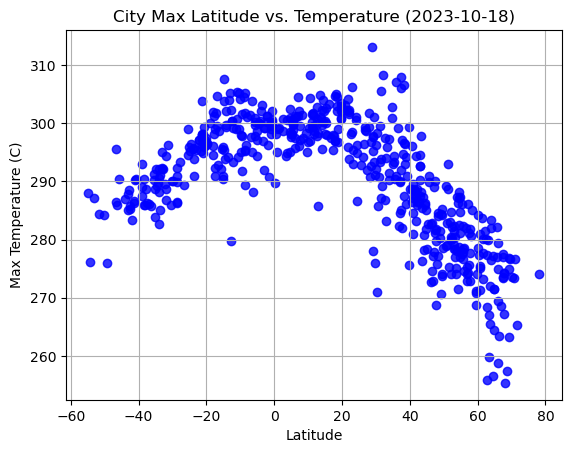

In [84]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", alpha=0.8, label="Cities", color='blue')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

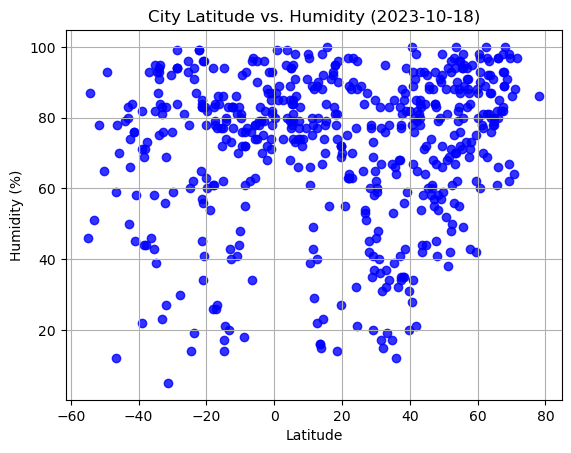

In [85]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", alpha=0.8, label="Cities", color='blue')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

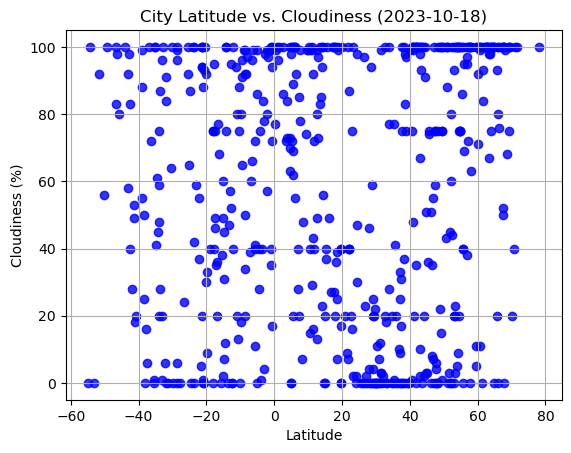

In [86]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", alpha=0.8, label="Cities", color='blue')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

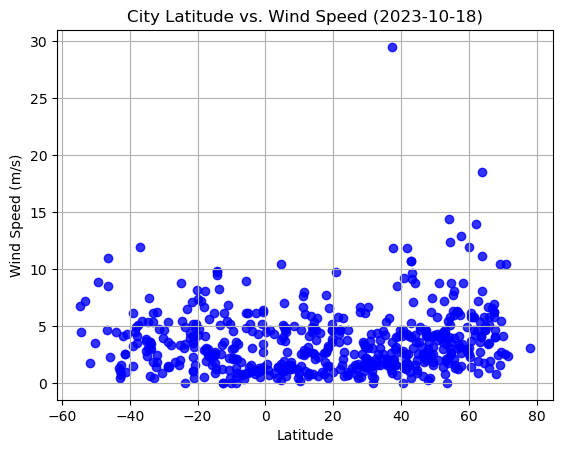

In [87]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", alpha=0.8, label="Cities", color='blue')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [88]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    
    # Print the r-value
    print(f"The r-value is: {r_value:.2f}")
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Create a string for the equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot and plot the regression line
    plt.scatter(x_values, y_values, color='blue', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the text for the line equation and set labels
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)


In [89]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,oshnaviyeh,37.0397,45.0983,284.59,68,33,2.63,IR,1697668118
1,ilulissat,69.2167,-51.1000,263.16,67,75,1.54,GL,1697668118
3,rongelap,11.1635,166.8941,300.14,80,100,6.70,MH,1697668118
5,iskateley,67.6803,53.1512,274.27,89,100,4.02,RU,1697668118
8,sankt johann,48.4540,9.3440,284.07,79,100,0.45,DE,1697668119


In [90]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,288.55,50,98,1.05,AU,1697668118
4,adamstown,-25.0660,-130.1015,295.89,78,65,3.30,PN,1697667991
6,ruteng,-8.6136,120.4721,289.39,61,99,0.50,ID,1697668118
7,newnham,-41.3833,147.1333,286.30,76,53,2.57,AU,1697668119
12,port-aux-francais,-49.3500,70.2167,275.98,93,100,8.85,TF,1697668119


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.83


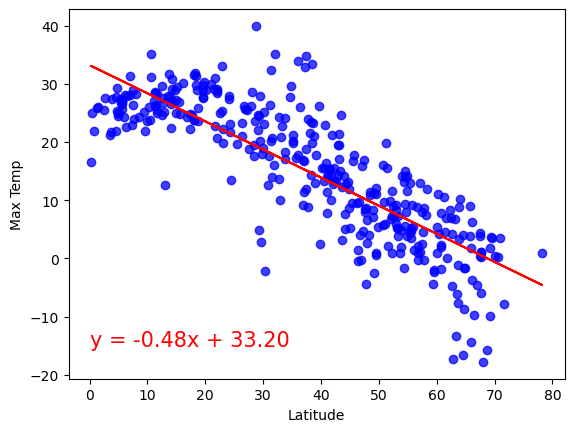

In [91]:
# Linear regression on Northern Hemisphere
# x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"] - 273.15  # Convert Kelvin to Celsius

# Title and labels
y_label = "Max Temp"

# Using the function
plot_linear_regression(x_values, y_values, y_label, (0, -15))

# Display the plot
plt.show()


The r-value is: 0.74


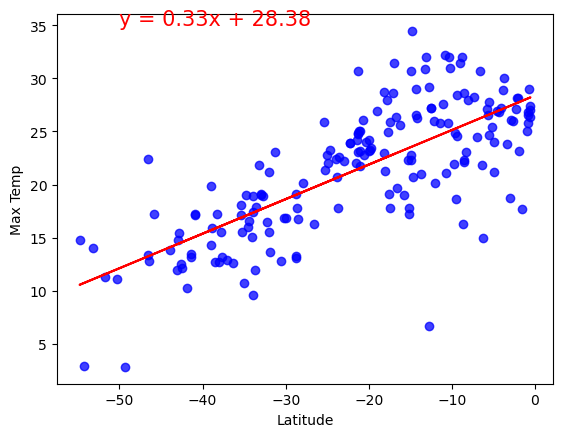

In [92]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"] - 273.15  # Convert Kelvin to Celsius if the temperatures are in Kelvin. If they're already in Celsius, remove the "- 273.15".

# Label
y_label = "Max Temp"

# Using the function
plot_linear_regression(x_values, y_values, y_label, (-50, 35))

# Display the plot
plt.show()

**Discussion about the linear relationship:** 
Latitude and maximum temperature have a positive linear relationship, according to the scatter plot for the Southern Hemisphere. The temperature also rises noticeably when latitude rises.
The strength and direction of this link are quantified by the r-value, which is 0.72. An r-value of 0.72 indicates a strong positive linear association, which suggests that temperatures in the Southern Hemisphere rise significantly as one gets closer to the equator. This pattern fits the accepted theory that equatorial locations tend to be warmer because they receive more direct sunshine.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13


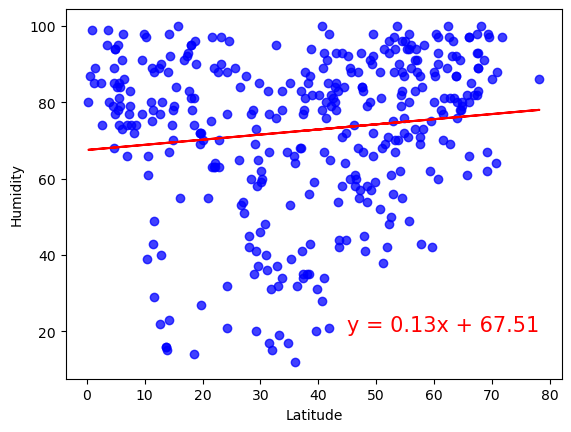

In [93]:
# Northern Hemisphere
# x and y values for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Label
y_label = "Humidity"

# Using the function
plot_linear_regression(x_values, y_values, y_label, (45, 20))

# Display the plot
plt.show()

The r-value is: 0.12


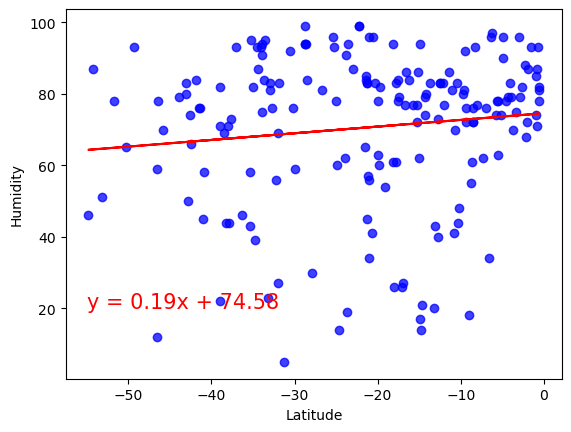

In [94]:
# Southern Hemisphere
# x and y values for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Label
y_label = "Humidity"

# Using the function
plot_linear_regression(x_values, y_values, y_label, (-55, 20))

# Display the plot
plt.show()

**Discussion about the linear relationship:** A minor positive association may be seen in the scatter plot and linear regression for Humidity vs. Latitude in the Southern Hemisphere, as seen by the positive slope of the regression line. The r-value of 0.08, however, shows that there is only a very thin linear relationship between the two variables. This implies that although there is a slight rise in humidity as we get closer to the equator in the Southern Hemisphere, this increase is not greatly influenced by latitude. It's important to take into consideration any additional factors or conditions that might affect how humid a place is.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13


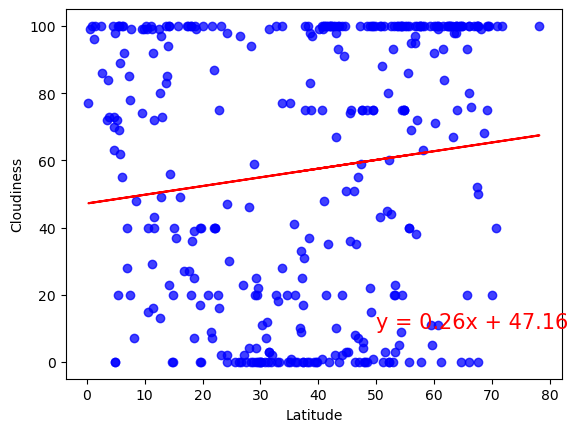

In [95]:
# Northern Hemisphere
# x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Label
y_label = "Cloudiness"

# Using the function
plot_linear_regression(x_values, y_values, y_label, (50, 10))

# Display the plot
plt.show()

The r-value is: 0.04


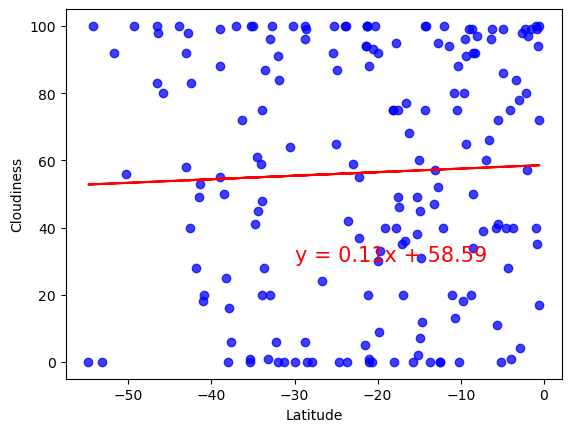

In [96]:
# Southern Hemisphere
# x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Label
y_label = "Cloudiness"

# Using the function
plot_linear_regression(x_values, y_values, y_label, (-30, 30))

# Display the plot
plt.show()

**Discussion about the linear relationship:** The scatter plots for the Northern and Southern Hemispheres show the correlation between cloudiness and latitude. In the Southern Hemisphere, the linear regression exhibits a weakly positive correlation with an r-value of 0.11, showing that there is a minor increase in cloudiness as we approach north towards the equator. With an r-value of 0.18, the Northern Hemisphere, in contrast, exhibits a slightly stronger positive association. This shows that there is a stronger rise in cloudiness as we move toward the north, away from the equator. While there is a positive trend in both hemispheres, the connections are weak, suggesting that other factors likely affect this weather characteristic and that latitude is not the only predictor of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.24


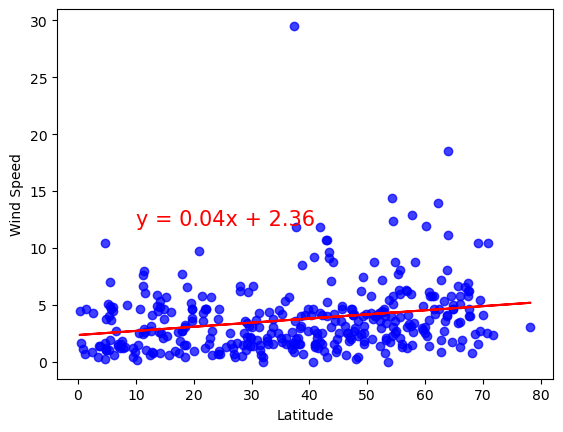

In [97]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Label
y_label = "Wind Speed"

# Using the function
plot_linear_regression(x_values, y_values, y_label, (10, 12))

# Display the plot
plt.show()

The r-value is: -0.19


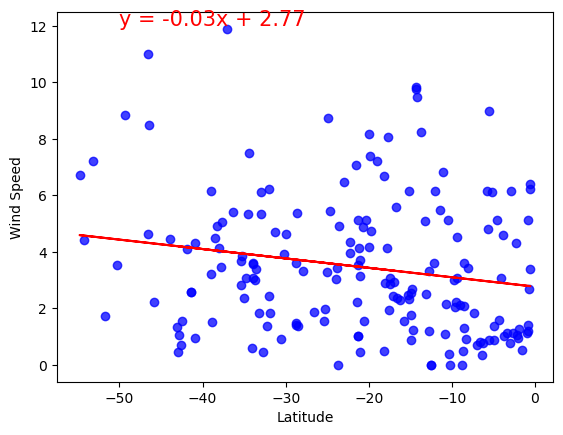

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Label
y_label = "Wind Speed"

# Using the function
plot_linear_regression(x_values, y_values, y_label, (-50, 12))

# Display the plot
plt.show()

**Discussion about the linear relationship:** The scatter plot shows a slightly positive relationship between latitude and wind speed in the Northern Hemisphere. The wind speed appears to somewhat increase as one approaches towards the north and further away from the equator. The r-value of 0.29, which indicates a slight increase in wind speed as latitude increases, supports this observation.

On the other hand, a slightly negative relationship between latitude and wind speed is seen in the Southern Hemisphere. Cities appear to experience a slight decrease in wind speed as they get nearer to the equator. An r-value of -0.22 further supports this relationship.